# Table of Contents

1. Problem Statement & Hypothesis Generation
2. Data Exploration
3. Data Cleaning
4. Data Manipulation a.k.a Feature Engineering
5. Machine Learning

# 1. Problem Statement and Hypothesis Generation

The Problem Statement：给定特征，目标是建立预测模型，判断美国人民收入水平在50K以下，还是以上。

这是个二分类问题。数据来自UCI

* Generating hypothesis is the most crucial step in building models.

* This step should be practiced before looking at the data.This step should be practiced before looking at the data. This is done to think broadly and not be constrained by what is available. In this step, we’ll __create a laundry list of factors__ which we think could influence the prediction metrics. 


1. Age
2. Marital Status
3. Income
4. Family Members
5. No. of Dependents
6. Tax Paid
7. Investment (Mutual Fund, Stock)
8. Return from Investments
9. Education
10. Spouse Education
11. Nationality
12. Occupation
13. Region in US
14. Race
15. Occupation category


Hò : There is no significant impact of the variables on the dependent variable.

Ha : There exists a significant impact of the variables on the dependent variable.


Remind you, this is **not an exhaustive list**. I’d suggest you not to limit your thoughts with the ones above, your aim should be **to make your project as comprehensive & presentable as possible.**

记住，每次你想到一个hypothesis，都试着想想它检验哪种相关性、可能成立的理由。比如，我们假设教育Education会有显著影响：更高的受教育水平，人们得到好工作的机会就越大，因此收入超过50K的可能性越高。

# 2. Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(199523, 41)

In [4]:
test.shape                       #train 和 test 都有41列，即test给出了income_level，方便自己对答案，检验模型预测效果

(99762, 41)

### 观察target

In [5]:
train.income_level.unique()              

array([-50000,  50000])

In [6]:
test.income_level.unique()                 # train 和test 对收入水平的标记不同，在模型评估时会很麻烦。二分类，所以转换成0，1

array(['-50000', ' 50000+.'], dtype=object)

In [7]:
train['income_level'][train.income_level== -50000] = 0
train['income_level'][train.income_level== 50000] = 1   # 建议train 和test分开处理

/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
test['income_level'][test.income_level == '-50000'] = 0
test['income_level'][test.income_level == ' 50000+.'] = 1  #这里字符串处理要小心，空格等很容易忽略；

/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [9]:
train.income_level.unique()

array([0, 1])

In [10]:
test.income_level.unique()

array([0, 1], dtype=object)

### 看看数据是否平衡

In [11]:
train_table=pd.crosstab(train.income_level,'count')
train_table

col_0,count
income_level,
0,187141
1,12382


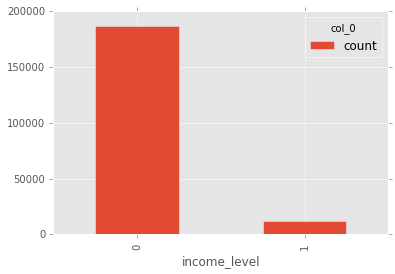

In [12]:
train_table.plot(kind='bar')

In [13]:
train_table / train_table.sum() * 100  # 单变量的比例计算操作

col_0,count
income_level,
0,93.794199
1,6.205801


#### 0占了近94%，1只有6%，可见数据非常不平衡。换句话说，好的算法将使模型达到94%的accuracy。但我们想要的模型效果，依赖 对少数的几个类 预测得有多好。不在乎的部分 占很大比例，对这部分预测得再好，也还是不在乎。即我们要的是精益求精，不精的随之。

### 查看变量类型：

In [14]:
train.dtypes

age                                  int64
class_of_worker                     object
industry_code                        int64
occupation_code                      int64
education                           object
wage_per_hour                        int64
enrolled_in_edu_inst_lastwk         object
marital_status                      object
major_industry_code                 object
major_occupation_code               object
race                                object
hispanic_origin                     object
sex                                 object
member_of_labor_union               object
reason_for_unemployment             object
full_parttime_employment_stat       object
capital_gains                        int64
capital_losses                       int64
dividend_from_Stocks                 int64
tax_filer_status                    object
region_of_previous_residence        object
state_of_previous_residence         object
d_household_family_stat             object
d_household

### 拆分出 分类变量和数值变量

In [15]:
categorical=train.dtypes[train.dtypes=='object']

In [16]:
categorical_variables=train[categorical.index]

In [17]:
numerical_variables=train.drop(categorical.index,axis=1)

#### 检测缺失值

In [18]:
numerical_variables.isnull().sum()

age                           0
industry_code                 0
occupation_code               0
wage_per_hour                 0
capital_gains                 0
capital_losses                0
dividend_from_Stocks          0
num_person_Worked_employer    0
business_or_self_employed     0
veterans_benefits             0
weeks_worked_in_year          0
year                          0
income_level                  0
dtype: int64

In [19]:
categorical_variables.isnull().sum()

class_of_worker                         0
education                               0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       874
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           708
d_household_family_stat                 0
d_household_summary                     0
migration_msa                       99696
migration_reg                       99696
migration_within_reg                99696
live_1_year_ago                         0
migration_sunbelt                   99696
family_members_under_18                 0
country_father                    

### 探索数值变量

In [20]:
# 年龄
numerical_variables.age.describe()

count    199523.000000
mean         34.494199
std          22.310895
min           0.000000
25%          15.000000
50%          33.000000
75%          50.000000
max          90.000000
Name: age, dtype: float64

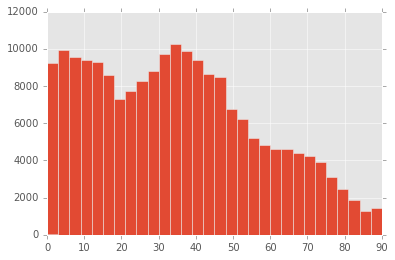

In [21]:
numerical_variables.age.hist(bins=30)

基本可以看出，随着年龄增加，对应的频数减少。正常情况下，20岁以下的人能挣 >50K 吗？ 所以需要对年龄变量进行分区。

In [22]:
# 资本收益与损失
numerical_variables[['capital_gains','capital_losses']].describe()

,capital_gains,capital_losses
count,199523.00000,199523.000000
mean,434.71899,37.313788
std,4697.53128,271.896428
min,0.00000,0.000000
25%,0.00000,0.000000
50%,0.00000,0.000000
75%,0.00000,0.000000
max,99999.00000,4608.000000


18.990822344


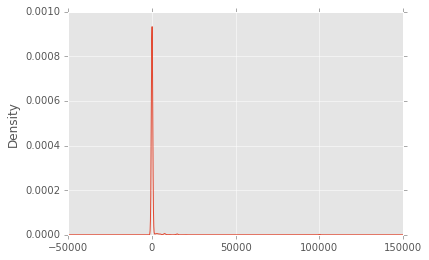

In [23]:
# 观察上表发现数值分布很极端：gains:均值为434.7，标准差极大，最小值、25%、50%、75%均为0，最大值却有99999，意味着其中极大部分为0，
# 画箱线图无效（5点中4点为0，极差太大）
numerical_variables['capital_gains'].plot(kind='density')
print(numerical_variables.capital_gains.skew())

7.63256469992


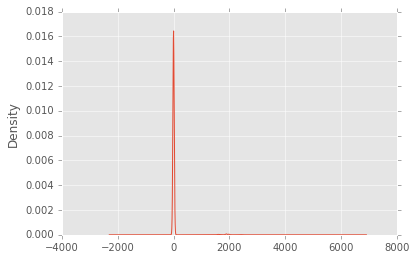

In [24]:
numerical_variables['capital_losses'].plot(kind='density')
print(numerical_variables.capital_losses.skew())

发现两个变量都极端右偏。在偏态分布中，需要normalizing. 这里我们还无法观察得出什么显著的判断，需要更深入地探索这两个变量。一个做法是，检查unique values. **如果unique values 少的话，我们就可以将分布制成表格：**

In [25]:
print(len(numerical_variables.capital_gains.unique()))
print(len(numerical_variables.capital_losses.unique()))

132
113


相比近20万观测值，132,113算很少了。

In [26]:
gain_tab=pd.crosstab(numerical_variables.capital_gains,'count')
losses_tab=pd.crosstab(numerical_variables.capital_losses,'count')

In [27]:
losses_tab.head()

col_0,count
capital_losses,
0,195617
155,1
213,10
323,10
419,29


#### 发现0有196717个，极大影响分布。极差太大，箱线图无法反映异常值。尝试.describe, sort_values：

In [28]:
losses_tab.describe()

col_0,count
count,113.000000
mean,1765.690265
std,18398.932625
min,1.000000
25%,7.000000
50%,13.000000
75%,38.000000
max,195617.000000


In [30]:
losses_tab.sort_values(by='count',ascending=False).head()

col_0,count
capital_losses,
0,195617
1902,407
1977,381
1887,364
1602,193


可以排除0试试。

#### 在分类问题中，我们也可以画【散点图】来观察【数值变量】间的相关性，看看0、1的分布聚集情况：

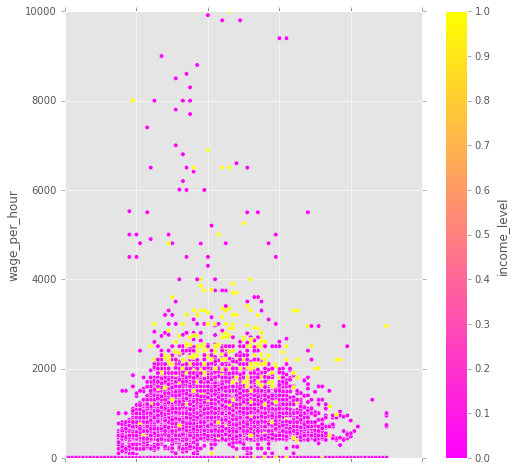

In [31]:
numerical_variables.plot(kind='scatter',
                         x='age',
                         y='wage_per_hour',
                         c='income_level',   # 只能是数值列[0,1]
                         cmap='spring',     # 还可选cool,summer,Oranges等颜色风格
                         figsize=(8,8),
                         xlim=(0,100),
                         ylim=(0,10000),
                         )

观察发现：

时薪 < 2000占绝大多数，且其中绝大部分收入水平 < 50K、标记为0；

年龄 < 18岁 及 > 80岁的，时薪为0，可以理解，佐证了之前对年龄进行分区的想法。

**收入水平> 50K的黄点，其时薪并不是特别高，一般分布在2000-4000；特高时薪的反而没有太多黄点**

我们需要多角度地探索变量的潜在趋向。建议对所有变量作图，看看它们的分布情况。这将为特征工程提供足够多的思路。

#### 类似的，也可以对分类变量作图：

In [32]:
categorical_variables.isnull().sum()

class_of_worker                         0
education                               0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       874
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           708
d_household_family_stat                 0
d_household_summary                     0
migration_msa                       99696
migration_reg                       99696
migration_within_reg                99696
live_1_year_ago                         0
migration_sunbelt                   99696
family_members_under_18                 0
country_father                    

#### 探索class_of_worker:

In [33]:
c_o_w=categorical_variables.class_of_worker.value_counts()
c_o_w

Not in universe                   100245
Private                            72028
Self-employed-not incorporated      8445
Local government                    7784
State government                    4227
Self-employed-incorporated          3265
Federal government                  2925
Never worked                         439
Without pay                          165
Name: class_of_worker, dtype: int64

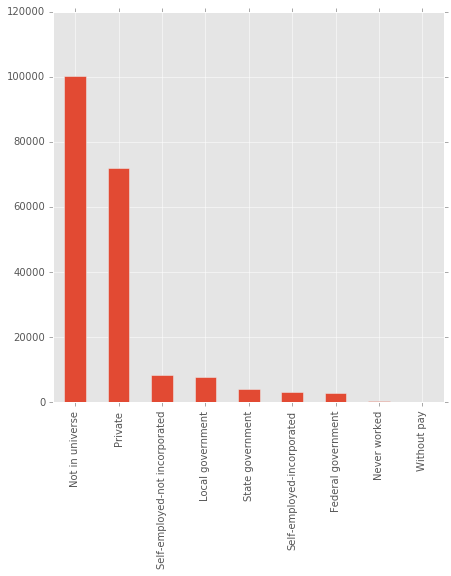

In [34]:
c_o_w.plot(kind='bar',figsize=(7,7))

In [35]:
gb_il=train.groupby('income_level')  # 可以用groupby 代替制表进行快速探索观察

In [36]:
gb_il.class_of_worker.value_counts()

income_level  class_of_worker               
0             Not in universe                   99341
              Private                           64706
              Self-employed-not incorporated     7355
              Local government                   6937
              State government                   3742
              Federal government                 2328
              Self-employed-incorporated         2131
              Never worked                        437
              Without pay                         164
1             Private                            7322
              Self-employed-incorporated         1134
              Self-employed-not incorporated     1090
              Not in universe                     904
              Local government                    847
              Federal government                  597
              State government                    485
              Never worked                          2
              Without pay            

尝试用groupby

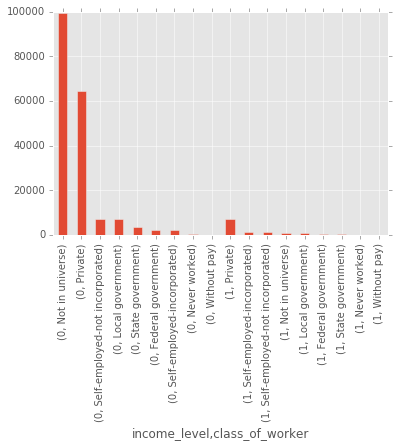

In [37]:
gb_il.class_of_worker.value_counts().plot(kind='bar')  # 用groupby可行，但效果不理想，包括转置

In [38]:
cowtab=pd.crosstab(index=train.income_level,   # 建议用转置.T 检查两个效果，包括作图
            columns=train.class_of_worker)  
cowtab

class_of_worker,Federal government,Local government,Never worked,Not in universe,Private,Self-employed-incorporated,Self-employed-not incorporated,State government,Without pay
income_level,,,,,,,,,
0,2328,6937,437,99341,64706,2131,7355,3742,164
1,597,847,2,904,7322,1134,1090,485,1


In [39]:
#cowtab.boxplot()  箱线图效果不好 <=> 数据不均衡

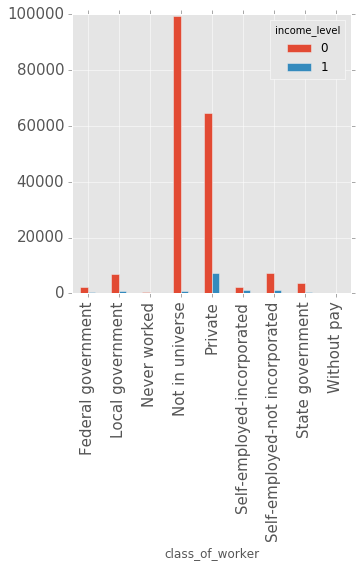

In [42]:
cowtab.T.plot(kind='bar',           
            figsize=(5,5),
             fontsize=15)        # x,y轴的字体大小

Not in universe ：Cases that are outside of the universe for a variable are labeled "NIU" on the codes page.这部分数据没有详细的信息，我们可以假想这部分人当时心情不好，就随便填了下调查问卷。


高收入水平和低收入水平中，private 相对其他class_of_worker都是最多的；注意语义逻辑，充分，必要条件。能不能说private，就高收入。以及能否泛化？

class_of_worker 这个变量看起来也很不均衡，即似乎只有2类水平（频数大于或小于某个水平）可以考量。这种情况下，比较好的做法是：把频数低于总数5%的类集合起来。


**时刻警惕：对每一个变量，要考虑现实场景，当时采集该数据时的场景，数据的可靠性，人们“不会回答什么”，而不是已有的“会回答什么”；分析出的结果仅仅基于这个统计数据，直接间接？因果关系？必须考虑没统计进来的数据。当总结时，想一下：没有统计进来的数据有哪些。**

#### 探索education

In [43]:
train.education.describe()

count                   199523
unique                      17
top       High school graduate
freq                     48407
Name: education, dtype: object

In [44]:
edutab=pd.crosstab(index=train.education,
                   columns=train.income_level)
edutab

income_level,0,1
education,,
10th grade,7495,62
11th grade,6806,70
12th grade no diploma,2092,34
1st 2nd 3rd or 4th grade,1786,13
5th or 6th grade,3255,22
7th and 8th grade,7935,72
9th grade,6192,38
Associates degree-academic program,3951,412
Associates degree-occup /vocational,4945,413


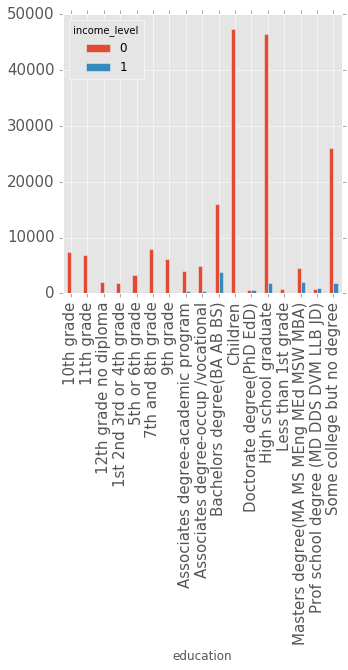

In [45]:
edutab.plot(kind='bar',
            figsize=(5,5),
            fontsize=15)

小孩0收入是显然的。

**我们关心的是蓝色的income_level为1的部分**：高收入人群中，学士学历的最多；或者说，学士学历【较】其他学历，有最多的高收入水平【人数】。（不能得出“因为”学士学历，“所以”高收入“。

## 3.数据清洗
* 缺失值处理
* 高相关（数值）变量处理

### 数值数据：
缺失值处理

In [46]:
numerical_variables.isnull().sum()  # 检测缺失值

age                           0
industry_code                 0
occupation_code               0
wage_per_hour                 0
capital_gains                 0
capital_losses                0
dividend_from_Stocks          0
num_person_Worked_employer    0
business_or_self_employed     0
veterans_benefits             0
weeks_worked_in_year          0
year                          0
income_level                  0
dtype: int64

数值变量中都没有缺失值，喜闻乐见。

### 高相关变量处理

In [47]:
corr=numerical_variables.corr()  # 计算变量（列）两两之间的（皮尔逊相关系数）
corr

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
age,1.000000,0.157822,0.117414,0.036938,0.053590,0.063351,0.104976,0.140887,-0.002265,0.674844,0.206181,0.004413,0.135720
industry_code,0.157822,1.000000,0.563493,0.165980,0.066017,0.072586,0.012774,0.642096,0.252694,0.476475,0.754472,0.003430,0.196190
occupation_code,0.117414,0.563493,1.000000,0.194498,0.002534,0.043680,-0.026726,0.515554,0.228952,0.438680,0.655613,-0.003140,0.013414
wage_per_hour,0.036938,0.165980,0.194498,1.000000,-0.001082,0.010993,-0.005731,0.191543,0.054051,0.113094,0.195687,0.002283,0.024528
capital_gains,0.053590,0.066017,0.002534,-0.001082,1.000000,-0.012700,0.131476,0.058015,0.015048,0.051530,0.083549,0.005243,0.240725
capital_losses,0.063351,0.072586,0.043680,0.010993,-0.012700,1.000000,0.042427,0.084255,0.024116,0.075391,0.100762,0.000096,0.147417
dividend_from_Stocks,0.104976,0.012774,-0.026726,-0.005731,0.131476,0.042427,1.000000,0.007206,-0.004885,0.054585,0.013823,0.001913,0.175779
num_person_Worked_employer,0.140887,0.642096,0.515554,0.191543,0.058015,0.084255,0.007206,1.000000,0.240553,0.463334,0.747302,0.018774,0.222684
business_or_self_employed,-0.002265,0.252694,0.228952,0.054051,0.015048,0.024116,-0.004885,0.240553,1.000000,0.177448,0.265872,0.007377,0.040473
veterans_benefits,0.674844,0.476475,0.438680,0.113094,0.051530,0.075391,0.054585,0.463334,0.177448,1.000000,0.532279,0.003122,0.140930


### 设定阈值为0.7，过滤 皮尔逊积矩相关系数> 0.7 的变量

In [48]:
threshold=corr[corr > 0.7].sum() -1 
threshold

age                           0.000000
industry_code                 0.754472
occupation_code               0.000000
wage_per_hour                 0.000000
capital_gains                 0.000000
capital_losses                0.000000
dividend_from_Stocks          0.000000
num_person_Worked_employer    0.747302
business_or_self_employed     0.000000
veterans_benefits             0.000000
weeks_worked_in_year          1.501774
year                          0.000000
income_level                  0.000000
dtype: float64

In [49]:
corv=threshold[threshold > 0.7]
corv

industry_code                 0.754472
num_person_Worked_employer    0.747302
weeks_worked_in_year          1.501774
dtype: float64

In [50]:
train[corv.index].corr()   

,industry_code,num_person_Worked_employer,weeks_worked_in_year
industry_code,1.000000,0.642096,0.754472
num_person_Worked_employer,0.642096,1.000000,0.747302
weeks_worked_in_year,0.754472,0.747302,1.000000


所以过滤变量weeks_worked_in_year:

In [51]:
numerical_variables=numerical_variables.drop('weeks_worked_in_year',axis=1)

### 分类数据：

缺失值处理：

In [52]:
nullpropo=categorical_variables.isnull().sum() / categorical_variables.count() *100  # 缺失值占比
nullpropo

class_of_worker                      0.000000
education                            0.000000
enrolled_in_edu_inst_lastwk          0.000000
marital_status                       0.000000
major_industry_code                  0.000000
major_occupation_code                0.000000
race                                 0.000000
hispanic_origin                      0.439972
sex                                  0.000000
member_of_labor_union                0.000000
reason_for_unemployment              0.000000
full_parttime_employment_stat        0.000000
tax_filer_status                     0.000000
region_of_previous_residence         0.000000
state_of_previous_residence          0.356110
d_household_family_stat              0.000000
d_household_summary                  0.000000
migration_msa                       99.868773
migration_reg                       99.868773
migration_within_reg                99.868773
live_1_year_ago                      0.000000
migration_sunbelt                 

In [53]:
categorical_variables=categorical_variables.drop(nullpropo[nullpropo > 50].index,axis=1) # 删除含50%以上缺失值的列

In [54]:
# 对于剩下的缺失值，一个较好的做法是用‘unavailable’填充：
categorical_variables.fillna('unavailable',inplace=True)

In [55]:
categorical_variables.isnull().sum()

class_of_worker                     0
education                           0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
race                                0
hispanic_origin                     0
sex                                 0
member_of_labor_union               0
reason_for_unemployment             0
full_parttime_employment_stat       0
tax_filer_status                    0
region_of_previous_residence        0
state_of_previous_residence         0
d_household_family_stat             0
d_household_summary                 0
live_1_year_ago                     0
family_members_under_18             0
country_father                      0
country_mother                      0
country_self                        0
citizenship                         0
fill_questionnaire_veteran_admin    0
dtype: int64

## 4.特征工程

In [56]:
numerical_variables.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,year,income_level
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,94.499672,0.062058
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,0.500001,0.241261
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,94.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,94.000000,0.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,95.000000,0.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,95.000000,1.000000


用groupby和value_count()（代替制表）快速观察各变量,发现:

1.age 到 dividend_from_Stock列，值为0的，income_level=0，所以把数据集按0和非0拆分，对非0集建模，test同样。

2.后面几个变量unique value 很少，试作图进一步观察

In [48]:
numerical_variables.sort_values(by=list(numerical_variables.columns))

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,year,income_level
66,0,0,0,0,0,0,0,0,0,0,94,0
105,0,0,0,0,0,0,0,0,0,0,94,0
311,0,0,0,0,0,0,0,0,0,0,94,0
422,0,0,0,0,0,0,0,0,0,0,94,0
582,0,0,0,0,0,0,0,0,0,0,94,0
708,0,0,0,0,0,0,0,0,0,0,94,0
1314,0,0,0,0,0,0,0,0,0,0,94,0
1412,0,0,0,0,0,0,0,0,0,0,94,0
1461,0,0,0,0,0,0,0,0,0,0,94,0
1674,0,0,0,0,0,0,0,0,0,0,94,0


# 机器学习
## 尝试1：只用数值变量，随机森林

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

In [59]:
X = numerical_variables.drop('income_level',axis=1)
y = numerical_variables.income_level

In [62]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [63]:
target = test.income_level

In [69]:
numerical_test=test[test.dtypes[test.dtypes != 'object'].index]

In [79]:
numerical_test=numerical_test.drop('weeks_worked_in_year',axis=1)

In [88]:
target=target.astype('int')

In [90]:
X_test = numerical_test

In [92]:
preds=clf.predict(X_test)

In [95]:
clf.score(X_test,target)

0.94790601631883886

非常高的accuracy，但可能100里有95个0，5个1，95个0全预测对，5个1全错。我们要预测是1。所以需要用其他度量，precision 或recall:

In [114]:
from sklearn import metrics

In [115]:
metrics.accuracy_score(target,preds)

0.94790601631883886

In [116]:
metrics.recall_score(target,preds)  # 查全率 40.7%

0.40672486259295182

In [117]:
metrics.precision_score(target,preds)  # 查准率 62.2%

0.62231016571852582

## 尝试2：Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
lr=LogisticRegression()

In [120]:
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [121]:
metrics.accuracy_score(target,lr.predict(X_test))

0.9443876425893627

In [123]:
metrics.recall_score(target,lr.predict(X_test))   # 查全率16.4% ，16.4%

0.16440349175557711

In [124]:
metrics.precision_score(target,lr.predict(X_test))  # 查准率72.3%，比随机森林的要高些

0.72851002865329517